In [273]:
import dataprocess01
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
import scipy.stats as stats

In [274]:
dataFrame=pd.read_csv("hmelq.csv")
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      3576 non-null   int64  
 1   loan     3576 non-null   int64  
 2   mortdue  3262 non-null   float64
 3   value    3512 non-null   float64
 4   reason   3429 non-null   object 
 5   job      3409 non-null   object 
 6   yoj      3264 non-null   float64
 7   derog    3149 non-null   float64
 8   delinq   3225 non-null   float64
 9   clage    3397 non-null   float64
 10  ninq     3273 non-null   float64
 11  clno     3443 non-null   float64
 12  debtinc  2809 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 335.3+ KB


In [275]:
dataFrame.isna().sum()

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

In [276]:
dataFrame2=dataFrame.copy()
dataFrame2=dataFrame2.dropna(axis=0,how="any")
dataFrame2.isna().sum()

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

In [277]:
dataFrame2.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


Burada numeric x değişkenlerin kolerasyon ilişkilerini ortaya çıkarıyoruz.Benim burada uyguladığım senaryo kolerasyon ilişkileri diğer kolonlara göre yüksek farklı olanları seçip ona göre geri kalan testleri uygulamak

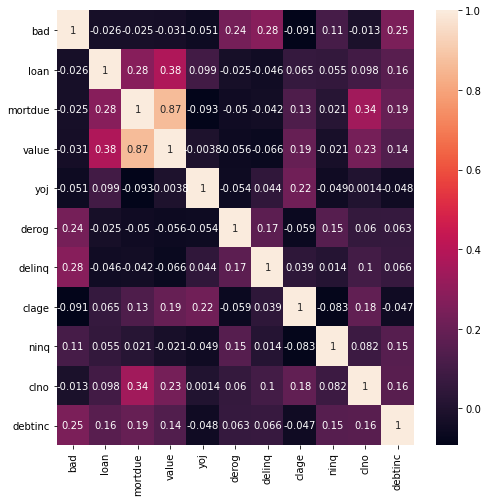

In [278]:
plot.subplots(figsize=(8,8))
sns.heatmap(dataFrame2.corr(),annot=True)

Yukarıda inceledğimiz zaman 4 değişken kolerasyon sıralaması açısından yüksek 4 değişkeni seçip görsellik açısından hem histogram hem de boxplot üzerinden normal dağılıma sahipliğini kesin lmamakla birlikte inceliyoruz

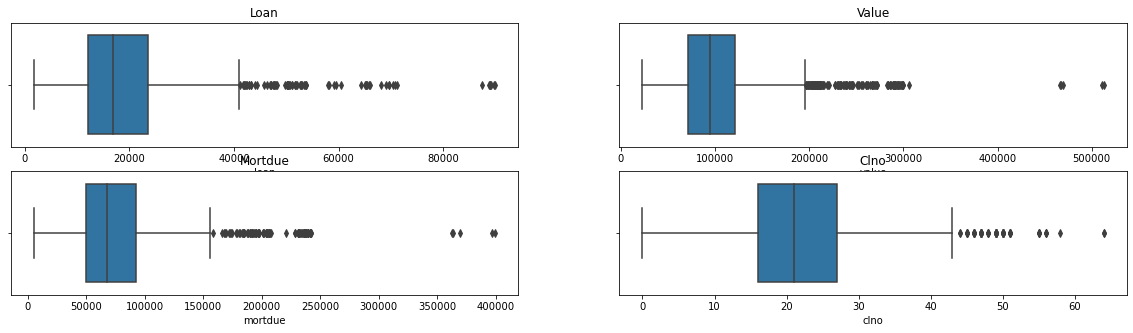

In [279]:
fig, ax = plot.subplots(2, 2, figsize = (20, 5))
sns.boxplot(dataFrame2["loan"], ax = ax[0][0])
ax[0][0].set_title("Loan")
sns.boxplot(dataFrame2["value"], ax = ax[0][1])
ax[0][1].set_title("Value")
sns.boxplot(dataFrame2["mortdue"], ax = ax[1][0])
ax[1][0].set_title("Mortdue")
sns.boxplot(dataFrame2["clno"], ax = ax[1][1])
ax[1][1].set_title("Clno")
plot.show()

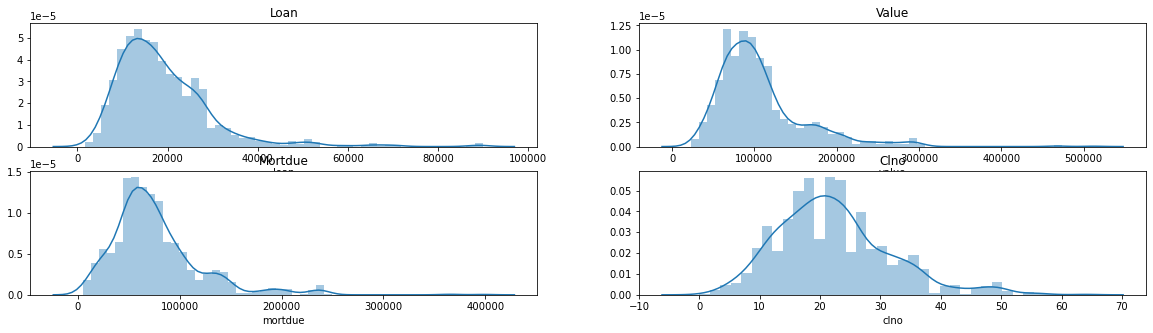

In [280]:
fig, ax = plot.subplots(2, 2, figsize = (20, 5))
sns.distplot(dataFrame2["loan"], ax = ax[0][0])
ax[0][0].set_title("Loan")
sns.distplot(dataFrame2["value"], ax = ax[0][1])
ax[0][1].set_title("Value")
sns.distplot(dataFrame2["mortdue"], ax = ax[1][0])
ax[1][0].set_title("Mortdue")
sns.distplot(dataFrame2["clno"], ax = ax[1][1])
ax[1][1].set_title("Clno")
plot.show()

Buradaki senaryo: Korelasyon Analizinde belirlediğim değişkenler ile kategorik değişkenler arasındaki anlamlılık testlerini gerçekleştirmek

In [281]:
def ConcatColumns(dataframe,a,b):
    XY=pd.concat([dataframe[a],dataframe[b]],axis=1)
    return XY

İlk başta reason konunun value kolonu üzerinde bir etkisi olup olmadığı inceleniyor

In [302]:
ValueReason=pd.concat([dataFrame2["value"],dataFrame2["reason"]],axis=1)
ValueReason.head()

,value,reason
153,136877.0,DebtCon
154,96784.0,DebtCon
155,36486.0,DebtCon
156,76718.0,HomeImp
157,43684.0,DebtCon


In [303]:
ValueReason=ValueReason.sort_values("reason")
A=ValueReason[:1427]
B=ValueReason[1428:]


Burada reason kolonunda iki farklı katgeori var. Bu iki farklı kategorinin value değerleri üzerinden normallikleri incelenir. Reason kolonunda DebtCon değeri value üzerinde test sonucu normal bir dağılıma sahip olmadığı gözlemlenir.

In [307]:
alfa=0.1
findNormalityHomogen=dataprocess0.NormalityAndHomogeneus
findNormalityHomogen.IsNormality(A["value"],alfa) #ho: it is Normal h1: Not normal

H0 is rejected.p= 2.254840840175745e-34


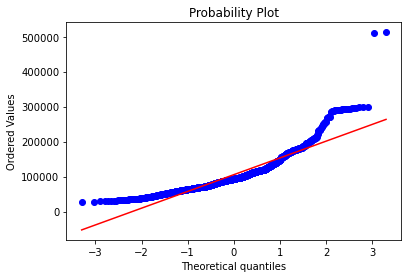

In [285]:
findNormalityHomogen.PlotNormality(A["value"])

In [309]:
findNormalityHomogen.IsNormality(B["value"],alfa) #ho: it is Normal h1: Not normal

H0 is rejected.p= 4.319616441639468e-25


İki test sonucu elimizdeki verilerin ikisinde de normal dağılım gözlenememektedir.

In [308]:
TTest=dataprocess0.IndependTest
TTest.ApplyIndepend(A["value"],B["value"],False,alfa)

H0 is failed reject.


Ancak bu iki kategorinin value üzerinde anlamlı bir fark olup olmamasını T-Test sonucu incelediğimiz zaman H0 hipotezimiz reddedilemez bir hale gelmektedir. Ho: Reason değerlerinin value değerleri üzerinde bir etkisi yoktur.

In [287]:
XY=ConcatColumns(dataFrame2,"value","job")
XY.tail(2)

,value,job
3548,86172.0,Self
3549,58760.0,Self


In [288]:
TTest=dataprocess0.IndependTest
TTest.ApplyIndepend(XY[XY.job=="Office"]["value"],XY[XY.job=="Sales"]["value"],True,alfa)

H0 is failed reject.


In [289]:
ZT=ConcatColumns(dataFrame2,"loan","job")
ZT.head()

,loan,job
153,18200,Mgr
154,21700,Mgr
155,34100,Mgr
156,8400,Mgr
157,17400,Mgr


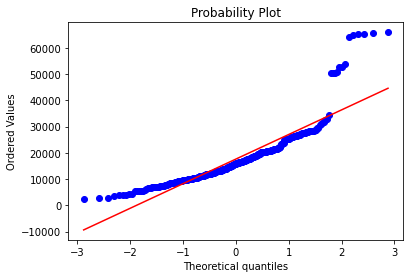

In [290]:
findNormalityHomogen.PlotNormality(ZT[ZT.job=="Office"]["loan"])

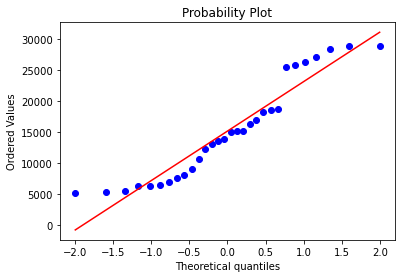

In [291]:
findNormalityHomogen.PlotNormality(ZT[ZT.job=="Sales"]["loan"])

In [292]:
alfa=0.001
findNormalityHomogen=dataprocess0.NormalityAndHomogeneus
findNormalityHomogen.IsNormality(ZT[ZT.job=="Sales"]["loan"],alfa) #ho: it is Normal h1: Not normal

H0 is failed reject. p= 0.009809590876102448


In [293]:
alfa=0.001
findNormalityHomogen=dataprocess0.NormalityAndHomogeneus
findNormalityHomogen.IsNormality(ZT[ZT.job=="Office"]["loan"],alfa) #ho: it is Normal h1: Not normal

H0 is rejected.p= 2.6600251187455787e-20


In [294]:
TTest=dataprocess0.IndependTest
TTest.ApplyIndepend(ZT[ZT.job=="Office"]["loan"],ZT[ZT.job=="Sales"]["loan"],False,alfa)

H0 is failed reject.


In [295]:
XY=ConcatColumns(dataFrame2,"reason","job")
XY.head(2)


,reason,job
153,DebtCon,Mgr
154,DebtCon,Mgr


Burada verisetimizde bulunan job ve reason kolonları arasında bir anlamlılık var mı yok mu diye inceliyoruz. Ho:Reasonve job birbirinden bağımsızdır.
Test sonucu alfa değeri 0.05 olduğu zaman H0 hipotezi reddedilir ve bu iki kolon birbirine bağımlıdır.

In [311]:
TTest=dataprocess01.KS2
TTest.ApplyKS2(XY[XY.reason=="HomeImp"]["job"],XY[XY.reason=="DebtCon"]["job"],0.01)

H0 is rejected. p= 0.0006587718612193205
